In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('C://Users//user//Downloads//Sample Dataset.xlsx')
pd.concat([df.dtypes, df.head(1).T, df.tail(1).T], axis=1)

,0,0,1037
Date,datetime64[ns],2015-11-19 00:00:00,2020-01-06 00:00:00
Signal,float64,13.7685,0
Open,float64,116.44,163.85
High,float64,116.65,165.54
Low,float64,115.74,163.54
Close,float64,116.06,165.35
Adj Close,float64,108.282,163.535


In [4]:
df.describe()

,Signal,Open,High,Low,Close,Adj Close
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,16.766190,141.847360,142.691801,140.907746,141.840973,136.341060
std,3.095783,18.475574,18.470255,18.404504,18.497010,21.427837
min,0.000000,94.080002,95.400002,93.639999,94.790001,-152.277847
25%,14.691150,132.132496,132.912495,130.542503,131.824993,125.290491
50%,17.298240,146.769997,147.959999,145.634995,146.885002,142.667732
75%,19.030890,155.367496,156.287495,154.422500,155.289993,151.798325
max,35.434147,172.789993,173.389999,171.949997,196.279999,168.842270


In [5]:
# lets see if date is unique
df['Date'].value_counts().max()

1

<AxesSubplot:>

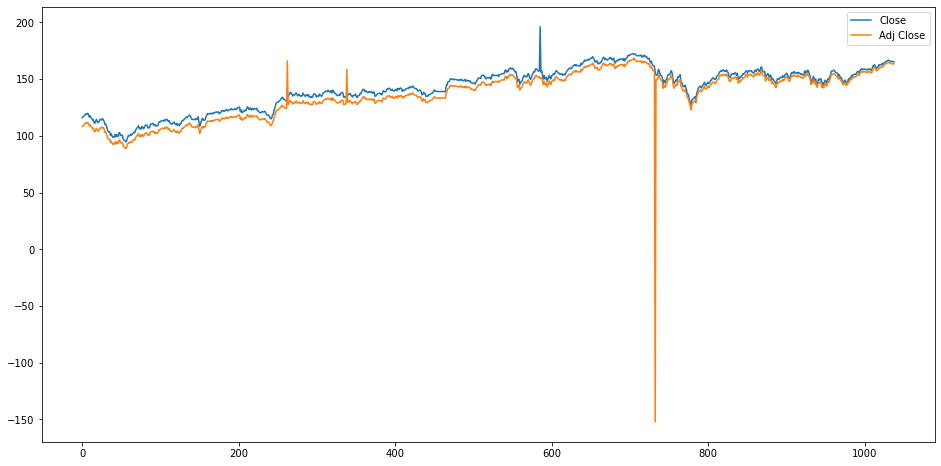

In [9]:
# have  alook at the adj close
df[['Close','Adj Close']].plot(figsize =(16,8))

<AxesSubplot:>

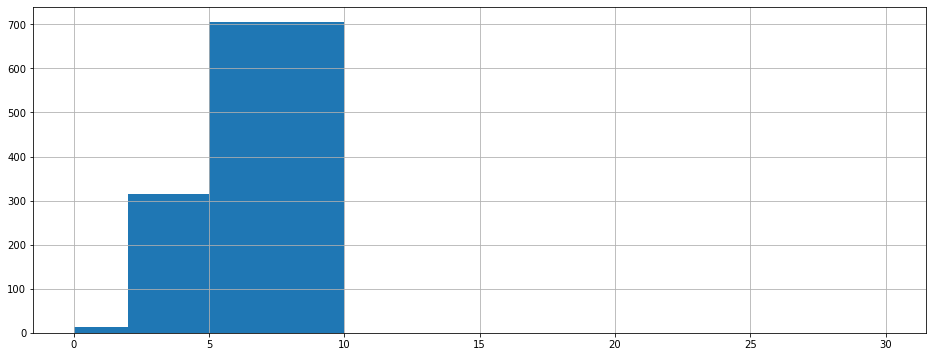

In [11]:
# lets see if there is a difference between the two
(df['Close'] - df['Adj Close']).hist(figsize=(16,6), bins=[0, 2, 5, 10, 15, 20, 30])


In [12]:
# okat lets see the describe

(df['Close'] - df['Adj Close']).describe()


count    1038.000000
mean        5.499913
std         9.748196
min       -33.025085
25%         3.777889
50%         5.693078
75%         6.516651
max       308.837845
dtype: float64

In [13]:
# this looks odd might want to check how adj close is made firstabs

<AxesSubplot:>

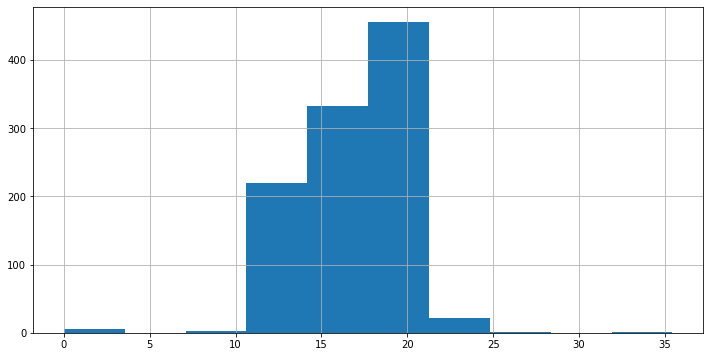

In [14]:
#now signal
df['Signal'].hist(figsize=(12,6))


In [15]:
df['Signal'].describe()


count    1038.000000
mean       16.766190
std         3.095783
min         0.000000
25%        14.691150
50%        17.298240
75%        19.030890
max        35.434147
Name: Signal, dtype: float64

In [16]:
#lets find these zeros and it seems to be at the last point
df[df['Signal'] == 0.0].index

Int64Index([1032, 1033, 1034, 1035, 1036, 1037], dtype='int64')

In [17]:
#now for the max
df[df['Signal'] == df['Signal'].max()].index


Int64Index([500], dtype='int64')

In [18]:
max_signal_iloc = df[df['Signal'] == df['Signal'].max()].index.values[0]
df.iloc[max_signal_iloc - 1: max_signal_iloc + 2] 

,Date,Signal,Open,High,Low,Close,Adj Close
499,2017-11-10,17.628384,146.710007,147.100006,146.350006,146.570007,140.810852
500,2017-11-13,35.434147,145.929993,146.820007,145.500000,146.610001,140.849274
501,2017-11-14,17.456319,146.059998,146.490005,145.589996,146.210007,140.465012


In [19]:
#looks like the max is an error. we should inform the signal provider and drop them for now.
#we could also fill forward the last real signal


<AxesSubplot:>

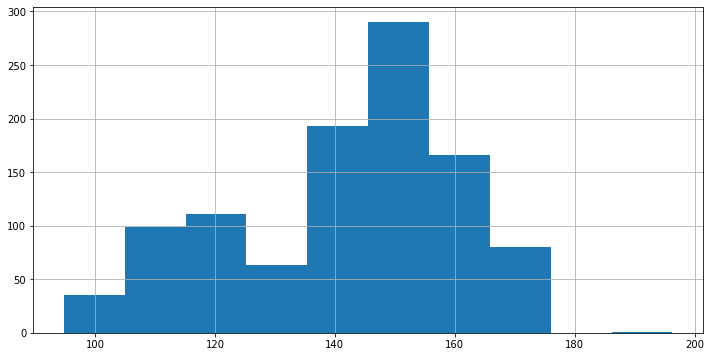

In [20]:
#Close Histogram
df['Close'].hist(figsize=(12,6))


In [21]:
#seems that the max close has some issues
#change it to the next day for better
max_close_iloc = df[df['Close'] == df['Close'].max()].index.values[0]
df.iloc[max_close_iloc - 1: max_close_iloc + 2]

,Date,Signal,Open,High,Low,Close,Adj Close
584,2018-03-16,19.385186,156.979996,158.270004,156.750000,157.800003,152.174042
585,2018-03-19,18.660897,157.169998,157.210007,154.449997,196.279999,150.708221
586,2018-03-20,19.177721,156.669998,157.020004,155.770004,156.240005,150.669647


<AxesSubplot:>

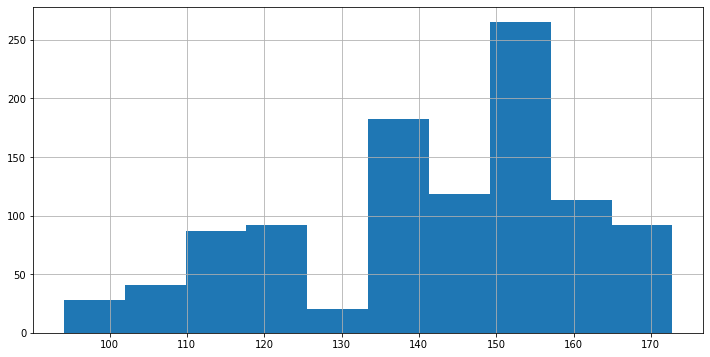

In [22]:
# Open Historgram
df['Open'].hist(figsize=(12,6))


In [23]:
# now see if the high is bigger then the close

df[~(df['Close'] <= df['High'])]


,Date,Signal,Open,High,Low,Close,Adj Close
431,2017-08-07,16.298805,140.440002,140.350000,139.710007,140.440002,134.595871
585,2018-03-19,18.660897,157.169998,157.210007,154.449997,196.279999,150.708221
766,2018-12-06,16.904044,145.449997,147.099997,143.429993,147.199997,143.173874
983,2019-10-17,18.878412,152.289993,153.309995,152.050003,153.339996,151.102173


In [24]:
#similar with open
df[~(df['Open'] <= df['High'])]


,Date,Signal,Open,High,Low,Close,Adj Close
431,2017-08-07,16.298805,140.440002,140.35,139.710007,140.440002,134.595871


In [25]:
#then with the close
df[~(df['Close'] >= df['Low'])]


,Date,Signal,Open,High,Low,Close,Adj Close
455,2017-09-11,15.838558,140.389999,140.919998,140.229996,139.110001,133.321198
456,2017-09-12,15.518587,141.039993,141.690002,140.820007,139.110001,133.321198
457,2017-09-13,16.158529,141.410004,142.220001,141.320007,139.110001,133.321198
458,2017-09-14,16.478500,141.779999,142.160004,141.419998,139.110001,133.321198
459,2017-09-15,15.198617,141.639999,142.470001,141.550003,139.110001,133.321198
460,2017-09-18,15.518587,142.619995,143.809998,142.600006,139.110001,133.321198
461,2017-09-19,16.798471,143.570007,143.690002,143.089996,139.110001,133.321198
462,2017-09-20,15.953688,143.529999,144.020004,143.259995,139.110001,133.321198
463,2017-09-21,16.004491,144.020004,144.259995,143.479996,139.110001,133.321198
464,2017-09-22,16.997600,143.669998,144.669998,143.559998,139.110001,133.321198


In [26]:
#whats going on with the close 13.1101 all the same?

In [27]:
df[(df['Close'] == 139.110001)]


,Date,Signal,Open,High,Low,Close,Adj Close
313,2017-02-17,16.635032,138.449997,139.160004,138.250000,139.110001,132.366592
453,2017-09-07,16.478500,139.589996,139.690002,138.589996,139.110001,133.321198
454,2017-09-08,15.518587,138.929993,139.770004,138.619995,139.110001,133.321198
455,2017-09-11,15.838558,140.389999,140.919998,140.229996,139.110001,133.321198
456,2017-09-12,15.518587,141.039993,141.690002,140.820007,139.110001,133.321198
457,2017-09-13,16.158529,141.410004,142.220001,141.320007,139.110001,133.321198
458,2017-09-14,16.478500,141.779999,142.160004,141.419998,139.110001,133.321198
459,2017-09-15,15.198617,141.639999,142.470001,141.550003,139.110001,133.321198
460,2017-09-18,15.518587,142.619995,143.809998,142.600006,139.110001,133.321198
461,2017-09-19,16.798471,143.570007,143.690002,143.089996,139.110001,133.321198


In [28]:
df[(df['Close'] == 139.110001) & ~(df['Close'] >= df['Low'])]


,Date,Signal,Open,High,Low,Close,Adj Close
455,2017-09-11,15.838558,140.389999,140.919998,140.229996,139.110001,133.321198
456,2017-09-12,15.518587,141.039993,141.690002,140.820007,139.110001,133.321198
457,2017-09-13,16.158529,141.410004,142.220001,141.320007,139.110001,133.321198
458,2017-09-14,16.478500,141.779999,142.160004,141.419998,139.110001,133.321198
459,2017-09-15,15.198617,141.639999,142.470001,141.550003,139.110001,133.321198
460,2017-09-18,15.518587,142.619995,143.809998,142.600006,139.110001,133.321198
461,2017-09-19,16.798471,143.570007,143.690002,143.089996,139.110001,133.321198
462,2017-09-20,15.953688,143.529999,144.020004,143.259995,139.110001,133.321198
463,2017-09-21,16.004491,144.020004,144.259995,143.479996,139.110001,133.321198
464,2017-09-22,16.997600,143.669998,144.669998,143.559998,139.110001,133.321198


In [29]:
#Close data looks to have been filled forward for several dates with 139.110001
#To use close as response variable perhaps fill it with the next days open for these instances

In [30]:
df[~(df['Open'] >= df['Low'])]


,Date,Signal,Open,High,Low,Close,Adj Close
407,2017-07-04,15.282748,141.339996,142.600000,141.400003,142.200006,135.700998
577,2018-03-07,18.885411,154.460007,156.929993,157.220001,156.740005,151.151840
671,2018-07-16,20.010313,167.759995,168.029999,169.960007,166.770004,161.779312
892,2019-06-10,19.055083,151.449997,153.139999,152.449997,151.750000,148.488159


In [31]:
df[~(df['High'] >= df['Low'])]


,Date,Signal,Open,High,Low,Close,Adj Close
577,2018-03-07,18.885411,154.460007,156.929993,157.220001,156.740005,151.151840
671,2018-07-16,20.010313,167.759995,168.029999,169.960007,166.770004,161.779312


In [32]:
#High and Low data doesn't look reliable, but if we don't plan to use it we can disregard this for now
#else check with vendor should these be swapped around?


In [33]:
# how it is the clean up

df = df.sort_values(by='Date')

# shift open price forward 1 day
df['Open +1D'] = df['Open'].shift(1)

# Add Return Columns for a Stationary Response
df['Open +1D Return'] = df['Open +1D'].pct_change()
df['Close Return'] = df['Close'].pct_change()

# drop last 6 zero rows from signal
df = df[df['Signal'] != 0.0]

# drop highest value from Signal
df = df[df['Signal'] != df['Signal'].max()]

# fill the highest value of Close with the next mornings open
max_close_iloc = df[df['Close'] == df['Close'].max()].index.values[0]
df.loc[max_close_iloc, 'Close'] = df.loc[max_close_iloc+1, 'Open']

# adjusting the period where close is filled forward with the next days open price instead
df.loc[(df['Close'] == 139.110001) & ~(df['Close'] >= df['Low']), 'Close'] = df.loc[(df['Close'] == 139.110001) & ~(df['Close'] >= df['Low']), 'Open +1D']

# set date as index
df = df.set_index('Date')

In [40]:
#then for the predictor and response 

import sklearn
import yellowbrick
import interpret

from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, RegressionTree
from interpret.perf import RegressionPerf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from yellowbrick.features import Rank2D
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.regressor import ResidualsPlot

#lets use 20% of the data

x_1, y_1, y_2 = df['Signal'], df['Close'], df['Open +1D']

y_2 = y_2.dropna()
x_2 = x_1[y_2.index]

train_x_1, dev_x_1, train_y_1, dev_y_1 = train_test_split(x_1, y_1, test_size=0.2, shuffle=False)
train_x_2, dev_x_2, train_y_2, dev_y_2 = train_test_split(x_2, y_2, test_size=0.2, shuffle=False)

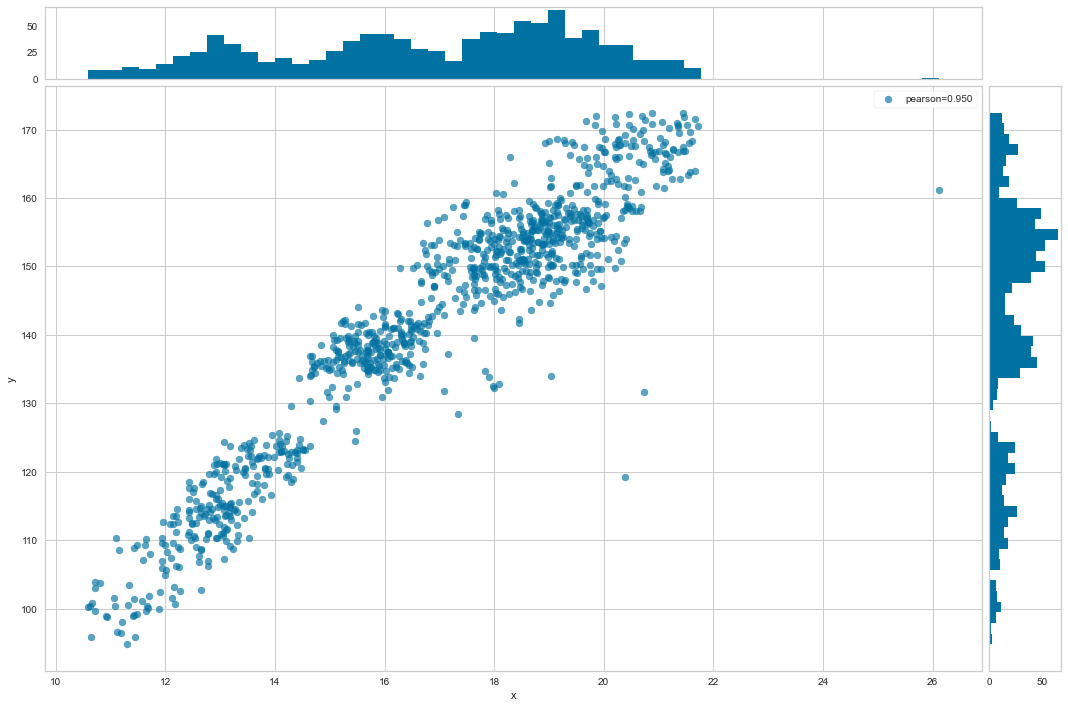

<AxesSubplot:xlabel='x', ylabel='y'>

In [41]:
#now lets check signal vs close plot

visualizer = JointPlotVisualizer(size=(1080, 720))
visualizer.fit_transform(x_1, y_1)
visualizer.show()

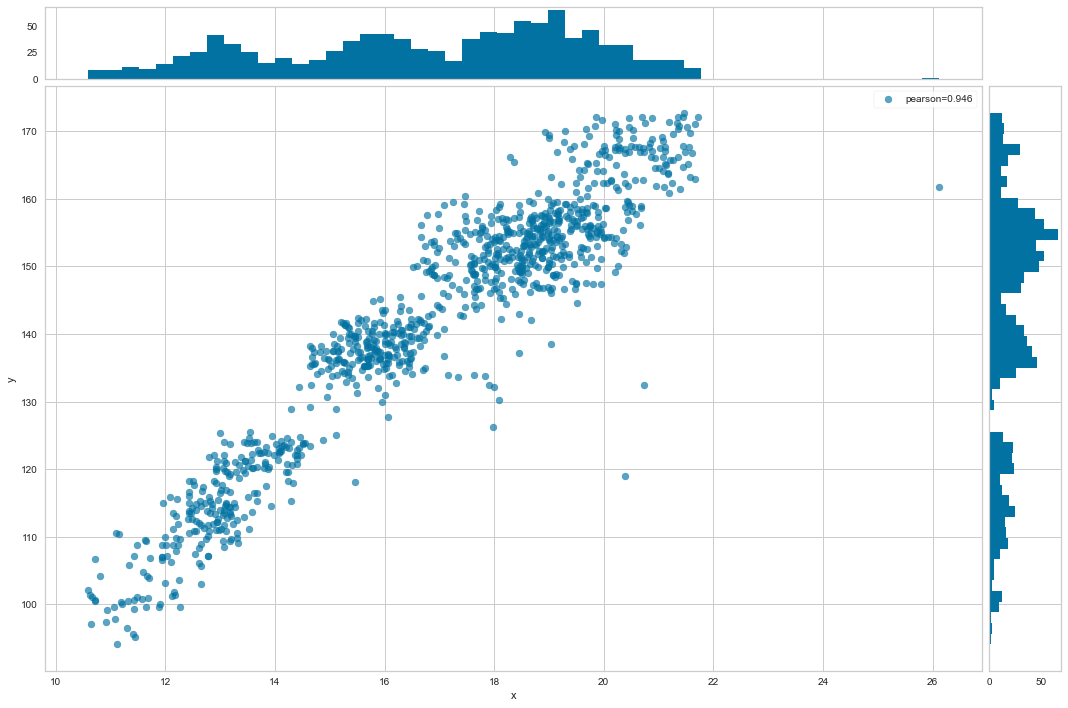

<AxesSubplot:xlabel='x', ylabel='y'>

In [42]:
#Signal vs Open +1D Plot

visualizer = JointPlotVisualizer(size=(1080, 720))
visualizer.fit_transform(x_2, y_2)
visualizer.show()

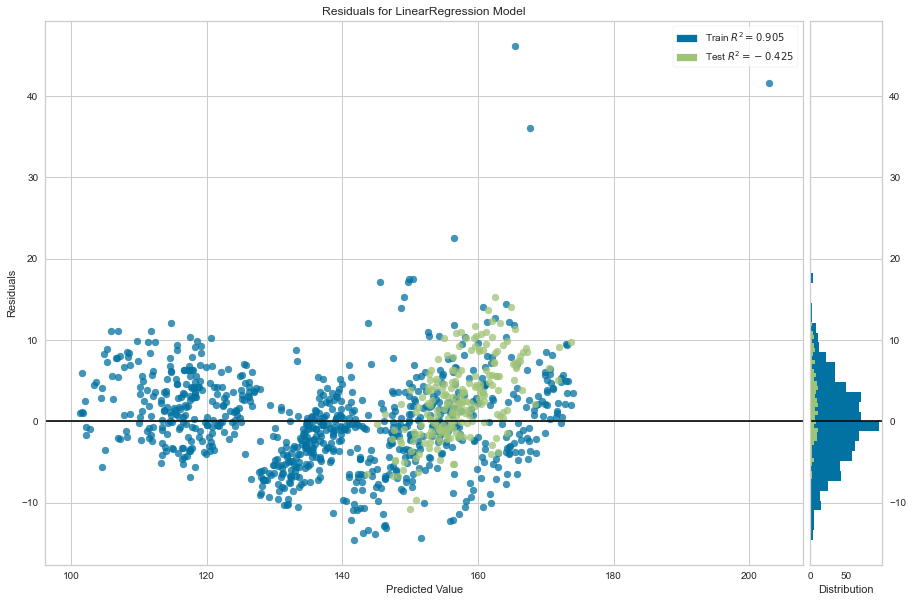

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
#now we have Train a Simple Linear Regression and Evaluate Residual Plot
visualizer = ResidualsPlot(LinearRegression(),size=(1080, 720))
visualizer.fit(train_x_1.values.reshape(-1, 1), train_y_1.values.reshape(-1, 1))
visualizer.score(dev_x_1.values.reshape(-1, 1), dev_y_1.values.reshape(-1, 1))
visualizer.show()

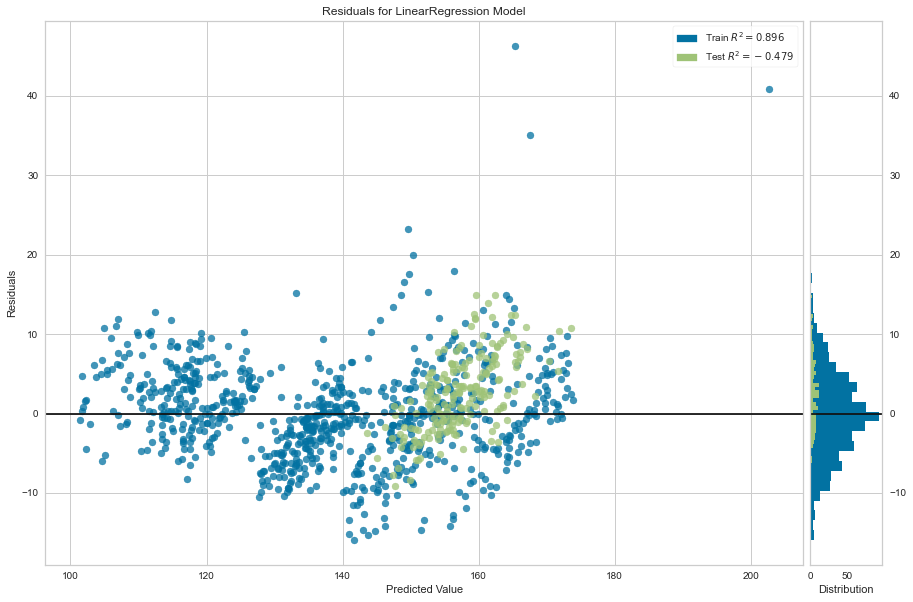

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
visualizer = ResidualsPlot(LinearRegression(),size=(1080, 720))
visualizer.fit(train_x_2.values.reshape(-1, 1), train_y_2.values.reshape(-1, 1))
visualizer.score(dev_x_2.values.reshape(-1, 1), dev_y_2.values.reshape(-1, 1))
visualizer.show()

In [45]:
#there are less statistical assumptions to violate, so is a good check on the linear
ebm = ExplainableBoostingRegressor()
ebm.fit(train_x_2.to_frame(), train_y_2)
rt = RegressionTree()
rt.fit(train_x_2.to_frame(), train_y_2)

In [46]:
ebm_perf = RegressionPerf(ebm.predict).explain_perf(dev_x_2.to_frame(), dev_y_2, name='Boosting Tree')
rt_perf = RegressionPerf(rt.predict).explain_perf(dev_x_2.to_frame(), dev_y_2, name='Regression Tree')

In [47]:
show(rt_perf)
show(ebm_perf)

<!-- http://127.0.0.1:7001/2642992550000/ -->

<!-- http://127.0.0.1:7001/2642991375696/ -->

In [48]:
# how check the Check Global Tree
ebm_global = ebm.explain_global(name='Boosting Tree')
rt_global = rt.explain_global(name='Regression Tree')

In [49]:
show(ebm_global)
show(rt_global)

<!-- http://127.0.0.1:7001/2643046519952/ -->

<!-- http://127.0.0.1:7001/2643046520528/ -->

In [ ]:
# conclusion

# The last six values of Signal have 0 so would like to know why?
# decided to drop last six rows, else can fill it in

# A large outlier of Signal was found on the 2017-11-13. Why?
# drop row, else fill it with static data

# Adj Close is very different from Close / Low / High / Open. How was it adjusted?
# might be best to ignore until more confident about the data

# a large ourlier of Close was found on the 2018-03-19. Would like to know why it is
# filled the highest value of Close with the next mornings open


# 2017-09-08 to 2017-09-22 look to be filled forward for the Close.
# fill with Open shifted forward 1 Day

# high and low inverted on 2018-03-07 and 2018-07-16
# ignore if we don't plan to test them as features or swap it around once confirmed with vendor
# if we plan to use them. fill Low with the min of [Open, High, Low, Close] and High with max of [Open, High, Low, Close]

# The signal looks to have no predictive power out of sample (20% of the most recent data). 
# This conclusion was drawn from conducting a residual plot of Signal against Open shifted forward 1 day and Close.
# To quickly check for some statistical violations the same was done on a tree model which produced similar conclusions.

# I'd hold off on doing a lot more analysis as it is unlikely to be valuable on it's own.
# I could focus on checking the signals power as an interaction term with other features 
# and transforming the problem into a classifier instead of a regression.